In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "../data/raw/athlete_events.csv"
df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

missing = df.isna().mean().sort_values(ascending=False)
missing.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Medal     0.853262
Weight    0.231912
Height    0.221938
Age       0.034944
Sex       0.000000
ID        0.000000
Name      0.000000
Team      0.000000
NOC       0.000000
Year      0.000000
Games     0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
dtype: float64

In [5]:
summer = df[df["Season"] == "Summer"].copy()

summer["medal_flag"] = summer["Medal"].notna().astype(int)

summer[["Year", "NOC", "Name", "Medal", "medal_flag"]].head()

,Year,NOC,Name,Medal,medal_flag
0,1992,CHN,A Dijiang,NaN,0
1,2012,CHN,A Lamusi,NaN,0
2,1920,DEN,Gunnar Nielsen Aaby,NaN,0
3,1900,DEN,Edgar Lindenau Aabye,Gold,1
26,1932,NED,"Cornelia ""Cor"" Aalten (-Strannood)",NaN,0


In [6]:
# Athletes per country-year (all participants, not only medal winners)
athletes = (
    summer.groupby(["Year", "NOC"])["ID"]
    .nunique()
    .reset_index(name="athletes")
)

# Medals per country-year (count medal rows)
medals = (
    summer[summer["medal_flag"] == 1]
    .groupby(["Year", "NOC"])["medal_flag"]
    .sum()
    .reset_index(name="medals")
)

country_year = athletes.merge(medals, on=["Year", "NOC"], how="left")
country_year["medals"] = country_year["medals"].fillna(0).astype(int)

country_year.head()

,Year,NOC,athletes,medals
0,1896,AUS,1,3
1,1896,AUT,3,5
2,1896,DEN,3,6
3,1896,FRA,12,11
4,1896,GBR,10,9


In [7]:
country_year = country_year.sort_values(["NOC", "Year"]).reset_index(drop=True)

country_year["prev_medals"] = (
    country_year.groupby("NOC")["medals"].shift(1).fillna(0).astype(int)
)

country_year.head(10)

,Year,NOC,athletes,medals,prev_medals
0,1936,AFG,15,0,0
1,1948,AFG,25,0,0
2,1956,AFG,12,0,0
3,1960,AFG,12,0,0
4,1964,AFG,8,0,0
5,1968,AFG,5,0,0
6,1972,AFG,8,0,0
7,1980,AFG,11,0,0
8,1988,AFG,5,0,0
9,1996,AFG,2,0,0


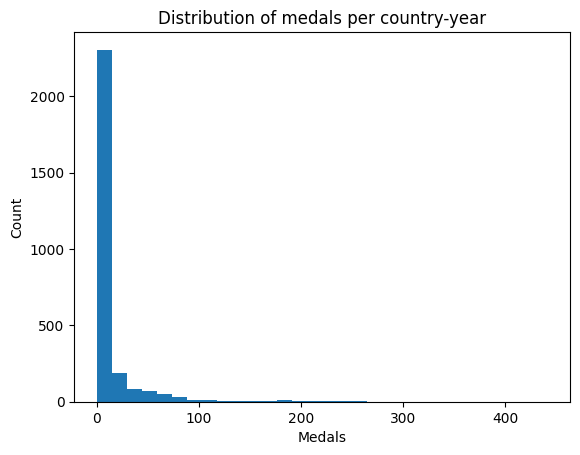

In [8]:
plt.figure()
plt.hist(country_year["medals"], bins=30)
plt.title("Distribution of medals per country-year")
plt.xlabel("Medals")
plt.ylabel("Count")
plt.show()

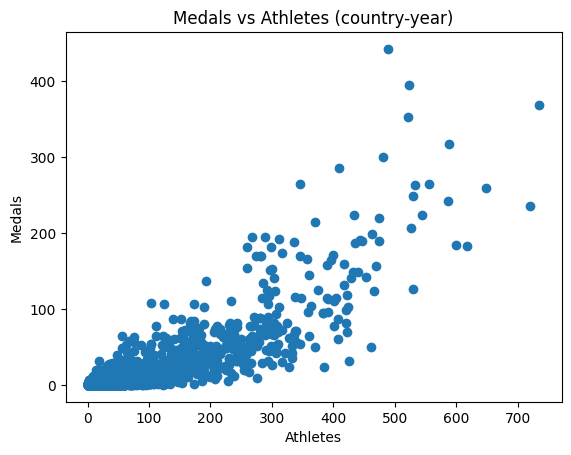

In [9]:
plt.figure()
plt.scatter(country_year["athletes"], country_year["medals"])
plt.title("Medals vs Athletes (country-year)")
plt.xlabel("Athletes")
plt.ylabel("Medals")
plt.show()

In [10]:
country_year[["athletes", "prev_medals", "medals"]].describe()

,athletes,prev_medals,medals
count,2810.000000,2810.000000,2810.000000
mean,56.533452,11.084342,12.130961
std,92.088828,32.832862,34.493249
min,1.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000
75%,62.000000,5.000000,6.000000
max,735.000000,442.000000,442.000000
